In [2]:
install.packages("pROC")
install.packages("mlbench")
install.packages("lattice")

Installing package into 'C:/Users/samri/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'pROC' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'pROC'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\samri\OneDrive\Documents\R\win-library\3.6\00LOCK\pROC\libs\x64\pROC.dll to C:\Users\samri\OneDrive\Documents\R\win-library\3.6\pROC\libs\x64\pROC.dll: Permission denied"Warning message:
"restored 'pROC'"


The downloaded binary packages are in
	C:\Users\samri\AppData\Local\Temp\Rtmp6xyvfl\downloaded_packages


Installing package into 'C:/Users/samri/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'mlbench' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\samri\AppData\Local\Temp\Rtmp6xyvfl\downloaded_packages


Installing package into 'C:/Users/samri/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'lattice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\samri\AppData\Local\Temp\Rtmp6xyvfl\downloaded_packages


In [3]:
library(caret)
library(pROC)
library(mlbench)
library(lattice)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'pROC' was built under R version 3.6.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Warning message:
"package 'mlbench' was built under R version 3.6.3"

In [4]:
glass <- read.csv(file.choose())

In [5]:
glass$Type[glass$Type==1] <- 'Type1'
glass$Type[glass$Type==2] <- 'Type2'
glass$Type[glass$Type==3] <- 'Type3'
glass$Type[glass$Type==4] <- 'Type4'
glass$Type[glass$Type==5] <- 'Type5'
glass$Type[glass$Type==6] <- 'Type6'
glass$Type[glass$Type==7] <- 'Type7'
str(glass)

'data.frame':	214 obs. of  10 variables:
 $ RI  : num  1.52 1.52 1.52 1.52 1.52 ...
 $ Na  : num  13.6 13.9 13.5 13.2 13.3 ...
 $ Mg  : num  4.49 3.6 3.55 3.69 3.62 3.61 3.6 3.61 3.58 3.6 ...
 $ Al  : num  1.1 1.36 1.54 1.29 1.24 1.62 1.14 1.05 1.37 1.36 ...
 $ Si  : num  71.8 72.7 73 72.6 73.1 ...
 $ K   : num  0.06 0.48 0.39 0.57 0.55 0.64 0.58 0.57 0.56 0.57 ...
 $ Ca  : num  8.75 7.83 7.78 8.22 8.07 8.07 8.17 8.24 8.3 8.4 ...
 $ Ba  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fe  : num  0 0 0 0 0 0.26 0 0 0 0.11 ...
 $ Type: chr  "Type1" "Type1" "Type1" "Type1" ...


In [7]:
glass$Type <- as.factor(glass$Type) # Factorize the Type in Glass dataset

In [8]:
# Data partition
set.seed(123)
ind <- sample(2,nrow(glass), replace = T, prob = c(0.7,0.3))
train <- glass[ind==1,]
test <- glass[ind==2,]

In [9]:
# KNN Model 

trcontrol <- trainControl(method = "repeatedcv", number = 10,repeats = 3)
set.seed(222)
fit <- train(Type ~., data = train, method = 'knn', tuneLength = 20,
              trControl = trcontrol, preProc = c("center","scale"))
    # default metric is accuracy but if u want to use ROC, then mention the same

In [10]:
# Model Performance :
fit # the optimum value for k should be 9

k-Nearest Neighbors 

157 samples
  9 predictor
  6 classes: 'Type1', 'Type2', 'Type3', 'Type5', 'Type6', 'Type7' 

Pre-processing: centered (9), scaled (9) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 142, 141, 143, 143, 140, 141, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.6536204  0.5209197
   7  0.6283590  0.4797558
   9  0.6294608  0.4806966
  11  0.6329097  0.4833553
  13  0.6375455  0.4862948
  15  0.6322584  0.4776483
  17  0.6385808  0.4848511
  19  0.6376482  0.4832760
  21  0.6194246  0.4552343
  23  0.6097619  0.4397916
  25  0.6053303  0.4338411
  27  0.5994841  0.4249243
  29  0.6047887  0.4323804
  31  0.6072724  0.4357811
  33  0.5921837  0.4137368
  35  0.5918686  0.4140878
  37  0.5696545  0.3825845
  39  0.5584839  0.3658658
  41  0.5450619  0.3455521
  43  0.5262430  0.3172603

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k

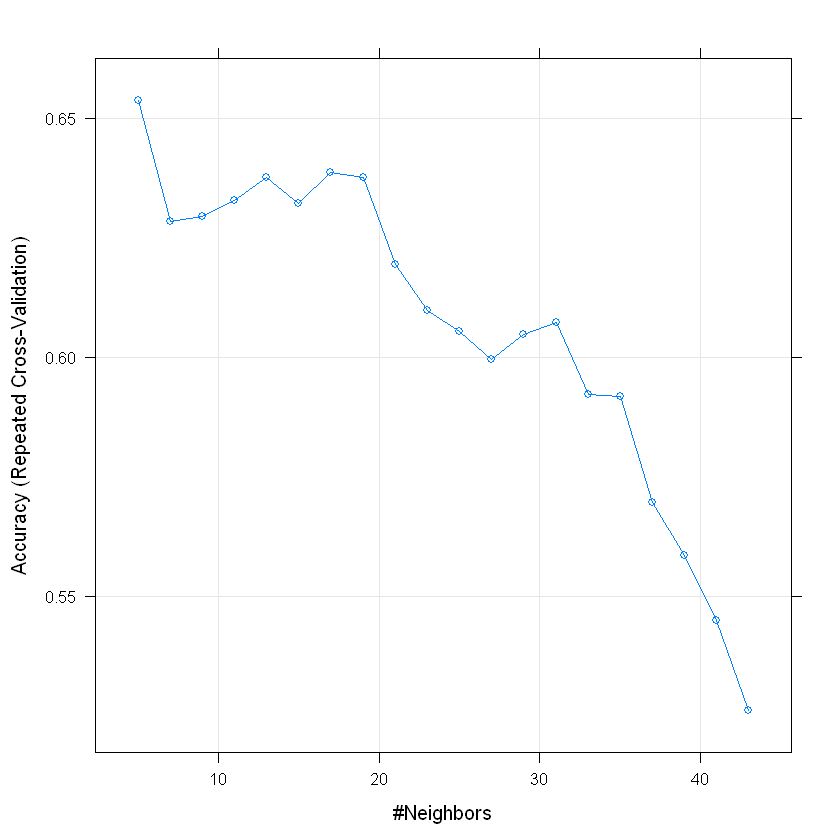

In [11]:
plot(fit)

In [12]:
varImp(fit)

ROC curve variable importance

  variables are sorted by maximum importance across the classes
   Type1   Type2  Type3 Type5  Type6   Type7
Mg 21.97 100.000 100.00 98.10 21.966 100.000
Al 48.35  98.249  48.35 95.72 48.349  98.249
K  22.84  24.712  97.81 58.51 36.076  24.712
Ba  0.00  12.018   0.00 93.53  0.000  12.018
Na 30.55  26.244  84.68 87.44 44.353  30.548
RI 25.03  25.030  25.03 60.99 25.030  16.541
Ca 31.04  55.133  47.47 31.04 38.878  55.133
Si 21.36   5.014  16.47 54.23 32.256  21.356
Fe  1.95   2.825  29.96 17.12  5.643   2.825

In [13]:
pred <- predict(fit, newdata = test )
confusionMatrix(pred, test$Type)

Confusion Matrix and Statistics

          Reference
Prediction Type1 Type2 Type3 Type5 Type6 Type7
     Type1    18     5     2     0     0     2
     Type2     3    13     0     0     0     1
     Type3     1     1     0     0     0     0
     Type5     0     2     0     3     0     0
     Type6     0     0     0     0     2     0
     Type7     0     0     0     0     1     3

Overall Statistics
                                          
               Accuracy : 0.6842          
                 95% CI : (0.5476, 0.8009)
    No Information Rate : 0.386           
    P-Value [Acc > NIR] : 4.946e-06       
                                          
                  Kappa : 0.5438          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Type1 Class: Type2 Class: Type3 Class: Type5
Sensitivity                0.8182       0.6190      0.00000      1.00000
Specificity                0.7429       0.

In [14]:
# 64.91 % is accuracy